In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.orbits import evolve_AC
from scripts.basic_functions import mag_vector

from classes.minicluster import AxionMiniclusterNFW
from classes.particles import Particles
from classes.ns import NeutronStar

In [2]:
M_MC = 1
MC = AxionMiniclusterNFW(M_MC, Particles.axionmass)
MC.center, MC.vcenter = [0.2*MC.radius_trunc(), 1e16, 0.], [0, -200., 0]

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:36: RuntimeWarning: divide by zero encountered in true_divide
  return self.rho_s()/(distances/self.rs()*np.power(1 + distances/self.rs(), 2))*np.heaviside(self.radius_trunc() - distances, 1)


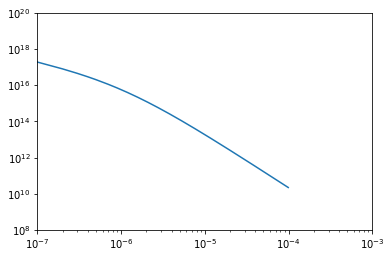

In [3]:
km_to_pc = 3.086*1e13
rs_plot = np.linspace(0, MC.radius_trunc(), 1000)
positions_plot = np.array([np.array([r_plot, 0, 0]) + MC.center for r_plot in rs_plot])
plt.plot(rs_plot/km_to_pc, np.power(km_to_pc,3)*MC.density_profile(positions_plot))
plt.xscale("log")
plt.yscale("log")
plt.xlim(left = 1e-7, right = 1e-3);
plt.ylim(top = 1e20, bottom = 1e8);

In [4]:
MC.encl_mass([np.array([MC.radius_trunc(),0,0]) + np.array(MC.center)])[0]

0.9999999999999971

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:41: RuntimeWarning: divide by zero encountered in true_divide
  return -4e-10*np.pi*G_N*self.rho_s()*np.power(self.rs(), 3)/distances*np.log((distances + self.rs())/self.rs())
c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:41: RuntimeWarning: invalid value encountered in multiply
  return -4e-10*np.pi*G_N*self.rho_s()*np.power(self.rs(), 3)/distances*np.log((distances + self.rs())/self.rs())


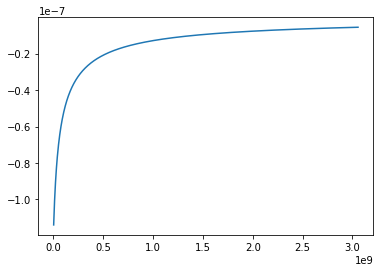

In [5]:
fake_positions = np.array([[r_plot,0,0] for r_plot in rs_plot])
plt.plot(rs_plot, MC.gravitational_potential(fake_positions + MC.center));

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:54: RuntimeWarning: invalid value encountered in true_divide
  return 1e-5*np.sqrt(G_N*self.encl_mass(positions)/mag_vector(positions_from_center))


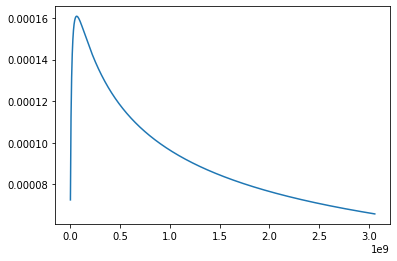

In [6]:
plt.plot(rs_plot, MC.circ_v(fake_positions + MC.center))

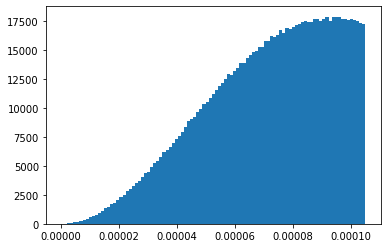

In [7]:
fake_position = np.array([MC.radius_trunc(),0, 0]) + MC.center
mag_vs = mag_vector(MC.draw_vs(fake_position, multiplier=1000000))
plt.hist(mag_vs, bins = np.linspace(0, MC.v_esc(fake_position)[0], 100));

In [8]:
NS = NeutronStar(1, 10)
bmax = MC.max_impact_param(NS)

In [9]:
evolve_AC(MC, NS)

In [10]:
nparticles = 10000
positions0, velocities0, mass_in = MC.draw_particles(nparticles, 1.2*MC.radius_trunc())

In [11]:
mass_in

0.9748691851372445

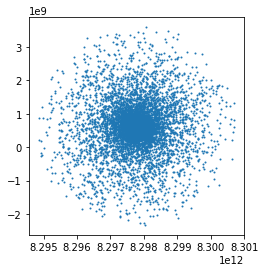

In [12]:
plt.scatter(np.unique(positions0, axis=0).T[1], np.unique(positions0, axis=0).T[0], s = 1)
ax = plt.gca()
ax.set_aspect('equal')

In [13]:
nparticles = 1000
bmax += 3*mag_vector(MC.center)/mag_vector(MC.vcenter)*MC.circ_v([np.array([MC.radius_trunc(),0,0]) + MC.center])[0]
positions, velocities, mass_in = MC.draw_particles(nparticles, bmax)

In [14]:
mass_in

2.2607183179982243e-05

In [15]:
positions

array([[ 1.69503712e+06,  8.29784326e+12,  1.17631078e+06],
       [ 1.69503712e+06,  8.29784326e+12,  1.17631078e+06],
       [ 1.69503712e+06,  8.29784326e+12,  1.17631078e+06],
       ...,
       [-3.24021694e+06,  8.29821593e+12, -7.15016022e+06],
       [-3.24021694e+06,  8.29821593e+12, -7.15016022e+06],
       [-3.24021694e+06,  8.29821593e+12, -7.15016022e+06]])

In [16]:
velocities

array([[ 3.55093208e-05, -1.99999982e+02,  1.57252470e-04],
       [-4.61001639e-05, -1.99999985e+02, -6.66312106e-05],
       [ 9.05046275e-05, -2.00000126e+02, -1.84546256e-05],
       ...,
       [ 1.01374542e-04, -1.99999981e+02,  7.14311509e-05],
       [ 1.01790021e-04, -2.00000100e+02, -1.88184878e-05],
       [-8.66724152e-06, -1.99999990e+02,  1.49963218e-04]])

In [17]:
all_ms = []

for i in np.arange(1000):
    cylinder = MC.bmax_cylinder(100, MC.center[0] + MC.radius_trunc(), resolution=1000)
    all_ms.append(cylinder[1])

np.mean(all_ms)

1.0228162477181386

In [20]:
particles = Particles([], [])
rcmax = NS.conversion_radius_max(Particles.axionmass)
while particles.nparticles < 100:
    positions, velocities, mass_in = MC.draw_particles(1000, bmax, multiplier=1000)
    particles.add_particles([np.array([0.]*len(positions))], positions, velocities, np.array([[None, None, None]]*len(positions)))
    particles.remove_particles_far(rcmax, NS)

print(particles.nparticles)
particles.remove_particles(np.arange(100, particles.nparticles))
print(particles.nparticles)

104
100


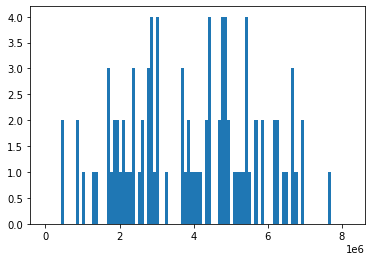

In [21]:
bs = np.sort(np.array(list(set([mag_vector([position[0], position[2]]) for position in particles.positions]))))
plt.hist(bs, bins = np.linspace(0, bmax, 100));